# Recrutamento preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga.

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais.

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.


In [1]:
import pandas as pd

In [25]:
dados = pd.read_excel('Recrutamento.xlsx')

In [3]:
dados.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Yes,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,No,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,No,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Yes,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Yes,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,No,NaN


In [4]:
dados.shape

(215, 15)

In [5]:
set(dados.status)

{'No', 'Yes'}

In [6]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Tratar dados nulos

In [9]:
# A biblioteca missingno é util para vizualização de dodos ausentes
import missingno as msno

<Axes: >

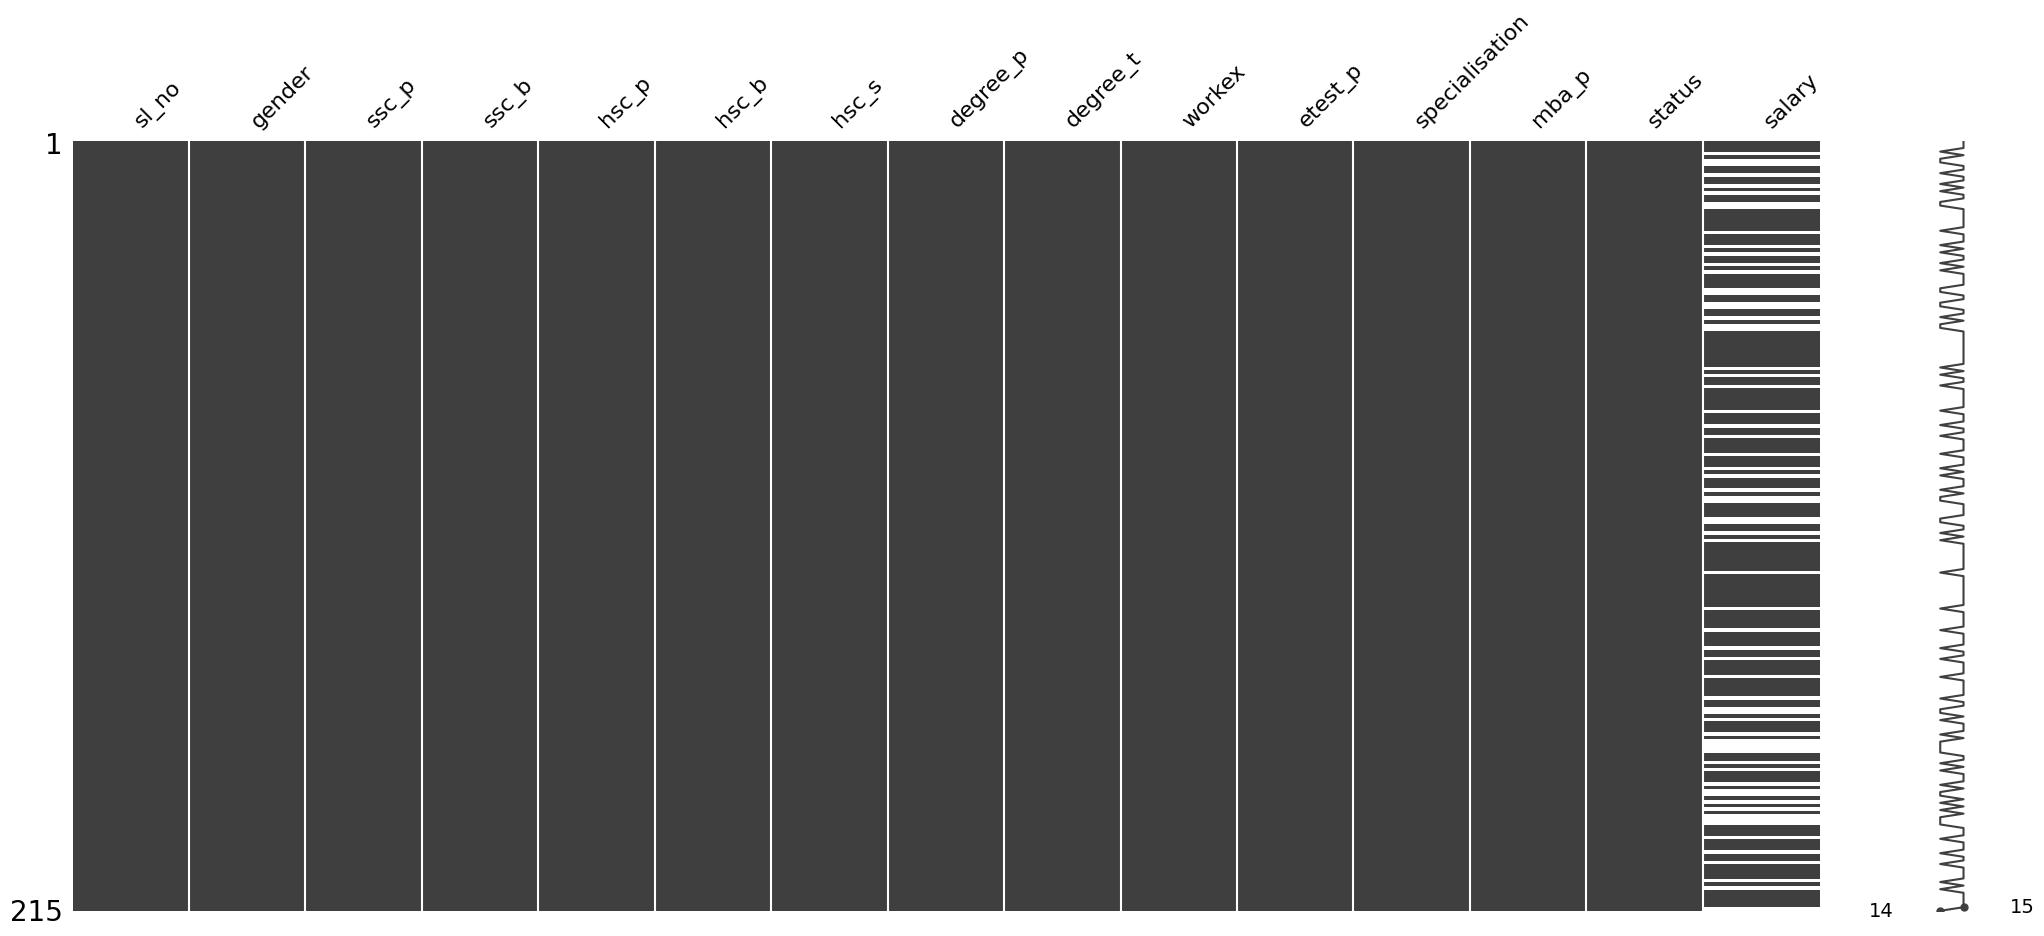

In [10]:
msno.matrix(dados)

In [13]:
# isnull() retorna uma tabela mostrando quais linhas estão nulas ou não
dados.isnull()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# isnull().sum() retorna as colunas mais a informação de quantidades de linhas nulas
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [15]:
import seaborn as sb

<ipython-input-18-76a46ae56bb3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='status', y='salary', data=dados, palette='hls')


<Axes: xlabel='status', ylabel='salary'>

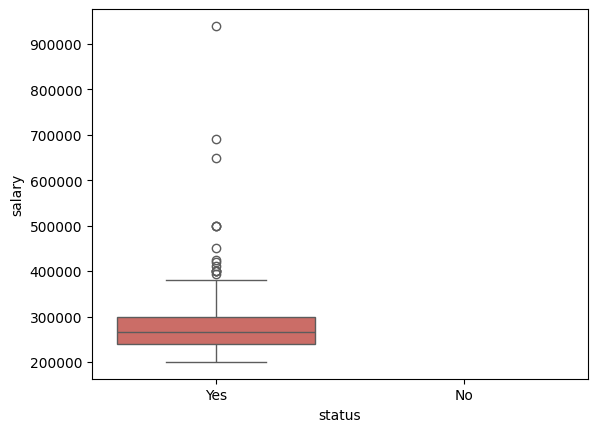

In [18]:
sb.boxplot(x='status', y='salary', data=dados, palette='hls')

In [37]:
# preencher dados nulos
# o parâmetro inplace indica se a função deve tratar os valores no próprio dataframe (True) ou retonar uma cópia com o tratamento (False)
dados['salary'].fillna(value=0, inplace=True)

In [38]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<Axes: xlabel='hsc_p'>

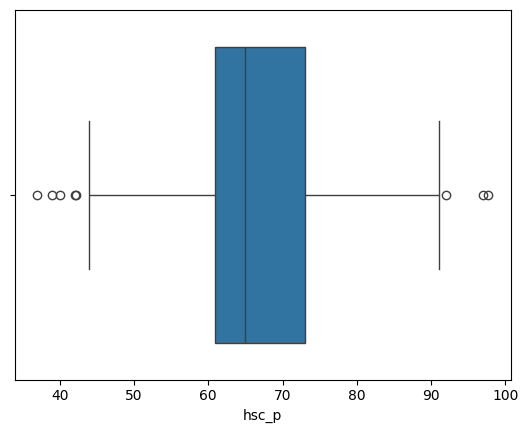

In [39]:
sb.boxplot(x=dados['hsc_p'])

*   A região azul é uma concentração de dados
*   A linha dentro da região azul é média dos dados
*   Os traços externos são a mínima é a máxima dos dados
*   Os pontos mais distantes são os dados discrepantes os outliers

<Axes: xlabel='hsc_p', ylabel='Count'>

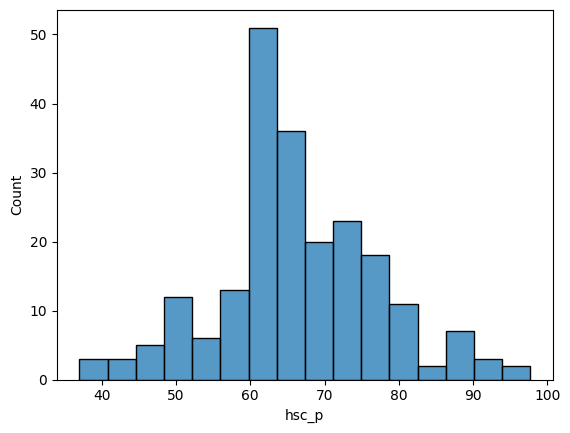

In [44]:
# sb.histplot(x=dados['hsc_p'])
sb.histplot(data=dados, x='hsc_p')

<Axes: xlabel='degree_p'>

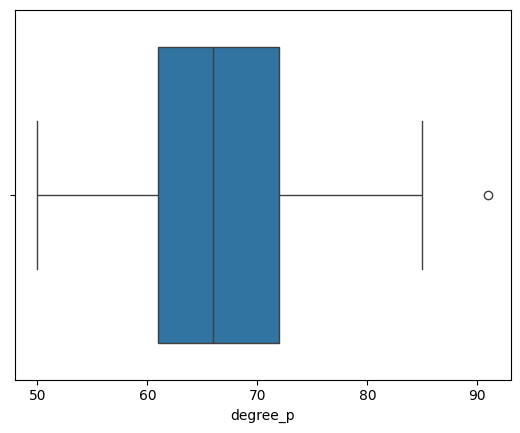

In [41]:
sb.boxplot(x=dados['degree_p'])

<Axes: xlabel='degree_p', ylabel='Count'>

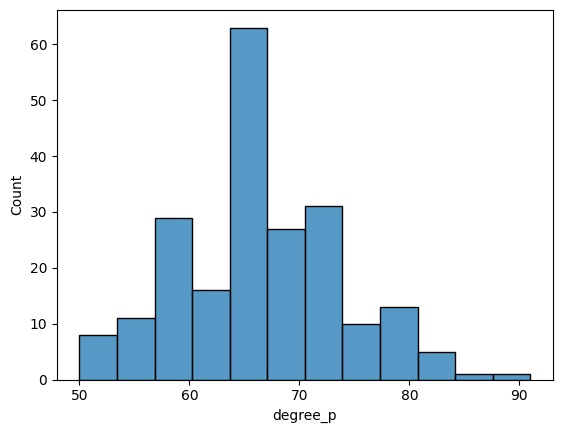

In [48]:
# sb.histplot(x=dados['degree_p'])
sb.histplot(data=dados, x='degree_p')

<Axes: xlabel='etest_p'>

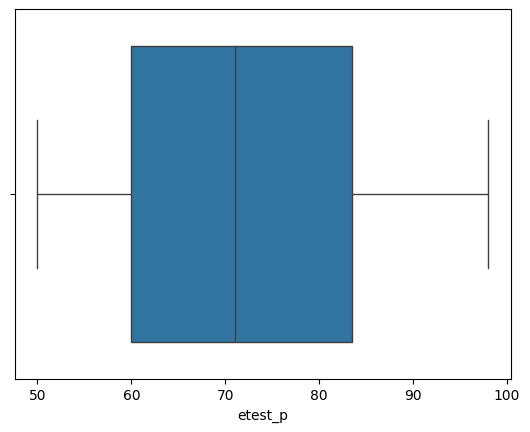

In [52]:
sb.boxplot(data=dados, x='etest_p')

<Axes: xlabel='mba_p'>

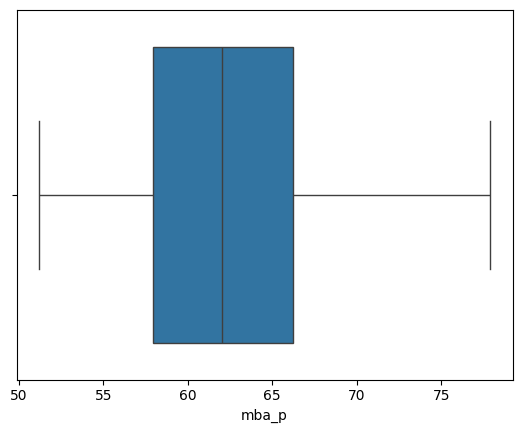

In [53]:
sb.boxplot(data=dados, x='mba_p')

<Axes: xlabel='salary'>

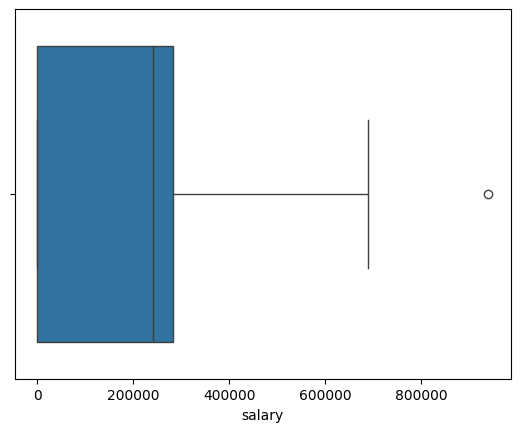

In [54]:
sb.boxplot(data=dados, x='salary')

<Axes: xlabel='salary', ylabel='Count'>

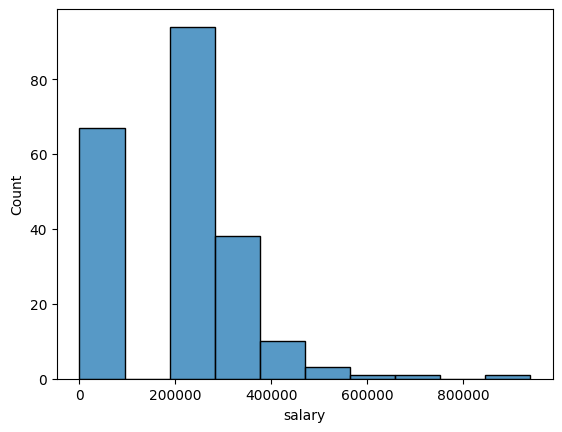

In [55]:
sb.histplot(data=dados, x='salary')

Vamos ver se existe alguma relação entre o nível acadêmico e o status de contratação.

[Text(36.5, 0.5, 'mba_p')]

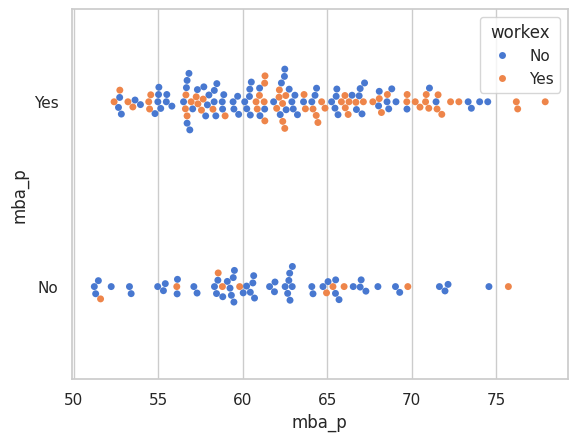

In [60]:
sb.set_theme(style="whitegrid", palette="muted")
ax = sb.swarmplot(data=dados, x='mba_p', y='status', hue='workex')
ax.set(ylabel='mba_p')

In [61]:
! pip install plotly_express

In [62]:
import plotly_express as px

In [63]:
px.violin(dados, y='salary', x='specialisation', color='gender', box=True, points='all')

*   Nesse gráfico podemos observar que na especialização de Mk&RH possui uma diferença salarial entre gêneros, porém pequena
*   Já na especialização de Mk&Fin possui uma diferenã salarial mais expressiva entre homens e mulheres

## Correção entre variáveis com mapa de calor

In [64]:
import matplotlib.pyplot as plt

<Axes: >

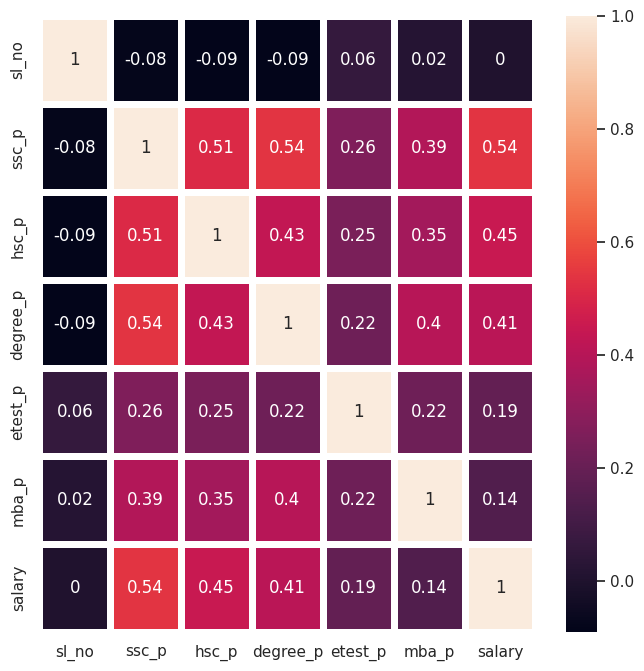

In [65]:
correlation_matriz = dados.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(8, 8))

sb.heatmap(data=correlation_matriz, annot=True, linewidth=5, ax=ax)

*   Quanto mais clara a cor dos quadrados (ou maior o número) maior é a correlaçao entre as variáveis
*   Prestar atenção nas variáveis que se cruzam com ela mesmas, pois elas sempre vão ter uma forte correlção

## Pré-processamento de textos

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [68]:
colunas = ['gender', 'workex', 'specialisation', 'status']

# Transformando textos em valores numéricos binários
label_encoder = LabelEncoder()
for col in colunas:
  dados[col] = label_encoder.fit_transform(dados[col])

In [69]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [77]:
# Nessa transformação cada valor da coluna se torna uma nova coluna
dummy_hsc_s = pd.get_dummies(data=dados['hsc_s'], prefix='dummy')
dummy_degree_t = pd.get_dummies(data=dados['degree_t'], prefix='dummy')

dados_dummy = pd.concat([dados, dummy_hsc_s, dummy_degree_t], axis=1)

In [78]:
dados_dummy.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,False,False,True,False,False,True


In [79]:
dados_dummy.drop(['hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

In [80]:
dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


<Axes: >

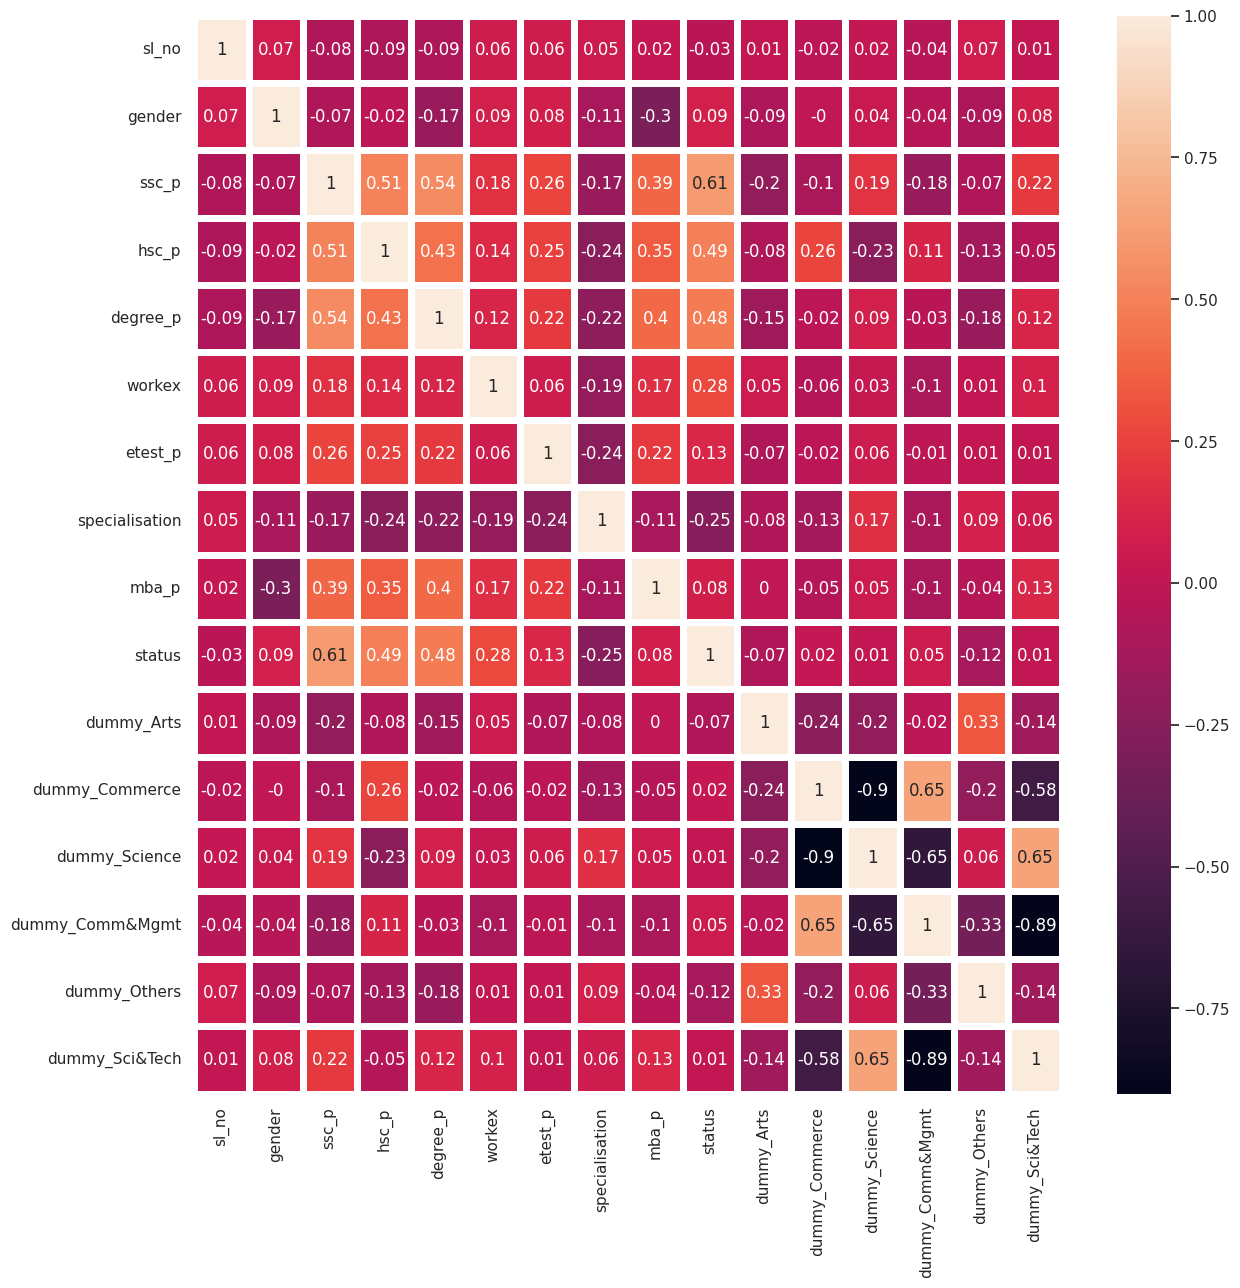

In [81]:
correlation_matriz = dados_dummy.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(14, 14))

sb.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

# Construindo o modelo

In [85]:
x = dados_dummy[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]
y = dados_dummy['status']

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [88]:
x_train.shape

(172, 5)

In [89]:
x_test.shape

(43, 5)

In [90]:
x

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,0,74.49
211,58.00,60.00,72.00,0,53.62
212,67.00,67.00,73.00,1,69.72
213,74.00,66.00,58.00,0,60.23


Antes de construir o modelo é preciso padronizar (normalizar) as escalas dos valores.

In [94]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [95]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [96]:
x_train_escalonado

array([[-1.92672757, -0.66933853, -0.31559155, -0.70402569, -0.11827471],
       [ 0.26708378, -0.33015908, -0.72064899, -0.70402569,  1.18141841],
       [-0.89983715, -0.57243011,  0.76456162, -0.70402569, -1.50694011],
       [ 1.06059001,  0.97810451,  2.51981052, -0.70402569,  1.18665207],
       [-1.4599592 , -1.54151426, -0.72064899, -0.70402569, -0.6521084 ],
       [ 0.30349171,  0.58853269, -0.09956092, -0.70402569,  1.63500259],
       [ 0.50046796, -0.76624694, -1.39574473, -0.70402569, -1.67790646],
       [ 1.80741941, -0.08788804,  1.97973393,  1.42040271,  1.83562636],
       [-0.05965408, -0.28170487, -0.31559155, -0.70402569, -0.06768263],
       [-0.43306878, -0.37861329, -0.18057241, -0.70402569, -0.27354006],
       [-0.43306878,  0.00902037, -0.31559155, -0.70402569,  0.31786392],
       [-0.52642246, -0.54045034, -0.28723753, -0.70402569, -0.39042522],
       [-1.55331288, -2.12296474, -1.26072558, -0.70402569, -1.88550845],
       [-0.7131298 , -0.28170487, -1.3

## "Achando" o valor do k

In [100]:
import numpy as np

In [101]:
# Para descobrir o melhor valor de k iremos fazer vários testes de valores diferentes de k e ver qual tem o menor erro
error = []

for i in range (1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_escalonado, y_train)
  pred_i = knn.predict(x_test_escalonado)

  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro Médio')

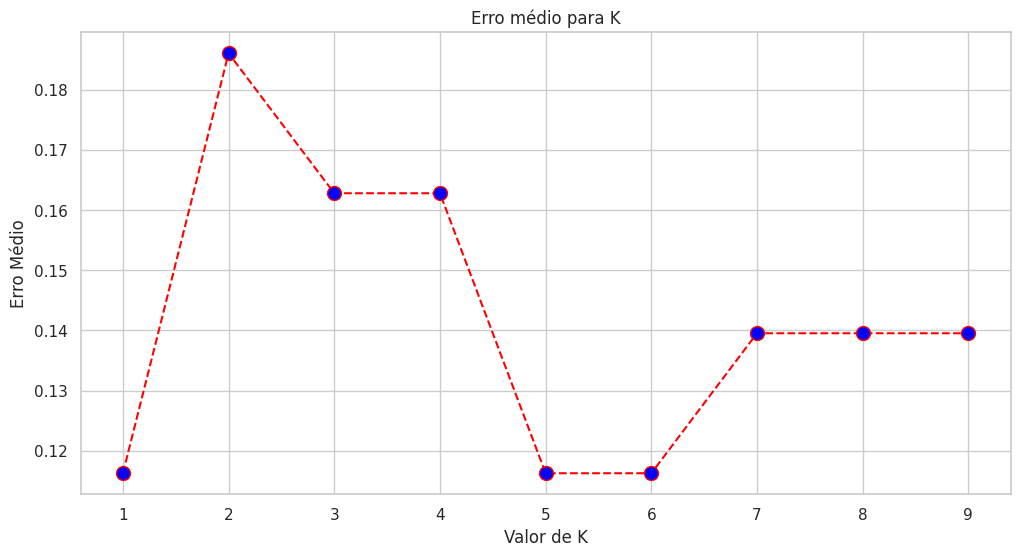

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Erro médio para K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')

*   Observando o gráfico os valores 5 e 6 possuem uma taxa de error menor comparados aos outros valores de k
*   Quando for escholer o valor de k é interessante escolher os números ímpares, pois com esse tipo de valor é possível desempatar caso os vizinhos próximos sejam números pares

In [104]:
modelo_classificar = KNeighborsClassifier(n_neighbors=5)

modelo_classificar.fit(x_train_escalonado, y_train)

y_predito = modelo_classificar.predict(x_test_escalonado)

In [105]:
y_predito

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [108]:
# Checar a acurácia do modelo
from sklearn.metrics import accuracy_score

In [109]:
print(accuracy_score(y_test, y_predito))

0.8837209302325582


## Modelo SVM - Support Vector Machine

In [113]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [114]:
svm = Pipeline([
    ('linear_svc', LinearSVC(C=1), ),
])

In [115]:
svm.fit(x_train_escalonado, y_train)

Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [116]:
y_predito_svm = svm.predict(x_test_escalonado)

In [117]:
print(accuracy_score(y_test, y_predito_svm))

0.8604651162790697


Comparando o KNN com o SVM, o KNN se saiu um pouco melhor. O SVM é sensível aos outliers, então talvez seja por isso que o modelo SVM se saiu um pouco pior comparado ao KNN.

É importante também observar os dados, se são estruturados e não estrututados, se são representativos ou não. A estrutura dos dados irão afetar cada modelos de forma diferente, então é sempre importante analisa-los.